In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_iris
from sklearn.covariance import EmpiricalCovariance, MinCovDet
from numpy import linalg as LA


In [12]:
iris_sns = sns.load_dataset("iris") 

SIGMA = iris_sns.cov()
CORR = iris_sns.corr()
SIGMA = np.array(SIGMA)
CORR = np.array(CORR)

# plt.close('all')
SIGMA_13 = SIGMA[[0,2], :][:, [0,2]]
CORR_13  = CORR[[0,2], :][:, [0,2]]
sigma_x = iris_sns['sepal_length'].std()
sigma_y = iris_sns['petal_length'].std()
cov_xy = SIGMA_13[0,1]

mu_x = iris_sns['sepal_length'].mean()
mu_y = iris_sns['petal_length'].mean()

x = np.linspace(3,9,num = 201)
y = np.linspace(1,7,num = 201)
xx,yy = np.meshgrid(x,y)


ValueError: could not convert string to float: 'setosa'

In [3]:
def generate_grid(V, mu_x, mu_y):
    # grid rotation
    
    x1_grid = np.arange(-10, 10 + 1, step=1);
    x2_grid = np.arange(-10, 10 + 1, step=1);
    
    XX1_grid,XX2_grid = np.meshgrid(x1_grid,x2_grid);
    
    X_grid = np.column_stack((XX1_grid.ravel(),XX2_grid.ravel()))
    
    Z_grid = X_grid@V.T;
    
    ZZ1_grid = Z_grid[:,0].reshape((len(x1_grid), len(x2_grid)))
    ZZ2_grid = Z_grid[:,1].reshape((len(x1_grid), len(x2_grid)))
    
    # translate centroid
    ZZ1_grid = ZZ1_grid + mu_x 
    ZZ2_grid = ZZ2_grid + mu_y
    
    return ZZ1_grid, ZZ2_grid


In [4]:
I = np.array([[1, 0],
              [0, 1]])

ZZ1_grid, ZZ2_grid = generate_grid(I, mu_x, mu_y)

x_array = np.array(iris_sns["sepal_length"])
y_array = np.array(iris_sns["petal_length"])

fig, ax = plt.subplots(figsize = (12,12))

plt.plot([x_array, mu_x+x_array*0],
         [y_array, mu_y+y_array*0], 
         color = [0.7,0.7,0.7])

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="petal_length")
sns.rugplot(data=iris_sns, x="sepal_length", y="petal_length", ax = ax)

plt.axvline(x=mu_x, linestyle = '--', color = 'r')
plt.axhline(y=mu_y, linestyle = '--', color = 'r')

plt.plot(mu_x,mu_y, color = 'k', 
         marker = 'x', markersize = 15)

ax.set_xlabel('Sepal length, $x_1$ (cm)')
ax.set_ylabel('Petal length, $x_3$ (cm)')

plt.plot(ZZ1_grid,ZZ2_grid,color = [0.7,0.7,0.7])
plt.plot(ZZ1_grid.T,ZZ2_grid.T,color = [0.7,0.7,0.7])

ax.axis('scaled')

ax.set_xbound(3,9)

ax.set_ybound(1,7)

# Euclidean distance
dd = np.sqrt((xx - mu_x)**2 + (yy - mu_y)**2)
ax.contour(xx,yy,dd,levels = [1, 2, 3], colors = 'r')


NameError: name 'mu_x' is not defined

In [5]:


D = np.array([[sigma_x, 0],
              [0, sigma_y]])

ZZ1_grid, ZZ2_grid = generate_grid(D, mu_x, mu_y)

x_array = np.array(iris_sns["sepal_length"])
y_array = np.array(iris_sns["petal_length"])

fig, ax = plt.subplots(figsize = (12,12))

plt.plot([x_array, mu_x+x_array*0],
         [y_array, mu_y+y_array*0], 
         color = [0.7,0.7,0.7])

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="petal_length")
sns.rugplot(data=iris_sns, x="sepal_length", y="petal_length", ax = ax)

plt.axvline(x=mu_x, linestyle = '--', color = 'r')
plt.axhline(y=mu_y, linestyle = '--', color = 'r')

plt.plot(mu_x,mu_y, color = 'k', 
         marker = 'x', markersize = 15)

ax.set_xlabel('Sepal length, $x_1$ (cm)')
ax.set_ylabel('Petal length, $x_3$ (cm)')

plt.plot(ZZ1_grid,ZZ2_grid,color = [0.7,0.7,0.7])
plt.plot(ZZ1_grid.T,ZZ2_grid.T,color = [0.7,0.7,0.7])

ax.axis('scaled')

ax.set_xbound(3,9)

ax.set_ybound(1,7)

# Euclidean distance
dd = np.sqrt(((xx - mu_x)/sigma_x)**2 + ((yy - mu_y)/sigma_y)**2)
ax.contour(xx,yy,dd,levels = [1, 2, 3], colors = 'r')



NameError: name 'sigma_x' is not defined

In [6]:

lambdas, V = LA.eig(SIGMA_13)

zz_maha = np.c_[xx.ravel(), yy.ravel()]

X = iris_sns.to_numpy()

X13 = np.array(X[:,[0,2]], dtype=float)
emp_cov_Xc = EmpiricalCovariance().fit(X13)

mahal_sq_Xc = emp_cov_Xc.mahalanobis(zz_maha)

mahal_sq_Xc = mahal_sq_Xc.reshape(xx.shape)
mahal_d_Xc = np.sqrt(mahal_sq_Xc)


ZZ1_grid, ZZ2_grid = generate_grid(V@np.diag(np.sqrt(lambdas)), mu_x, mu_y)

x_array = np.array(iris_sns["sepal_length"])
y_array = np.array(iris_sns["petal_length"])

fig, ax = plt.subplots(figsize = (12,12))

plt.plot([x_array, mu_x+x_array*0],
         [y_array, mu_y+y_array*0], 
         color = [0.7,0.7,0.7])

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="petal_length")
sns.rugplot(data=iris_sns, x="sepal_length", y="petal_length", ax = ax)

plt.axvline(x=mu_x, linestyle = '--', color = 'r')
plt.axhline(y=mu_y, linestyle = '--', color = 'r')

plt.plot(mu_x,mu_y, color = 'k', 
         marker = 'x', markersize = 15)

ax.set_xlabel('Sepal length, $x_1$ (cm)')
ax.set_ylabel('Petal length, $x_3$ (cm)')

plt.plot(ZZ1_grid,ZZ2_grid,color = [0.7,0.7,0.7])
plt.plot(ZZ1_grid.T,ZZ2_grid.T,color = [0.7,0.7,0.7])

ax.axis('scaled')

ax.set_xbound(3,9)

ax.set_ybound(1,7)

ax.contour(xx,yy,mahal_d_Xc,levels = [1, 2, 3], colors = 'r')

NameError: name 'SIGMA_13' is not defined

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
import scipy
import seaborn as sns

# Load the iris data
iris_sns = sns.load_dataset("iris")
# A copy from Seaborn


SIGMA = iris_sns.cov()
SIGMA = np.array(SIGMA)

MU = iris_sns.mean()
MU = np.array(MU)

g = sns.pairplot(iris_sns, diag_kind='kde',
                 kind='scatter', plot_kws={'alpha': 0.5})
g.axes[0][0]

for i in [0, 1, 2, 3]:

    for j in [0, 1, 2, 3]:

        if i == j:
            pass
        else:

            ax = g.axes[i][j]
            mu_x = MU[j]
            mu_y = MU[i]

            ax.axvline(x=mu_x, color='r', linestyle='--')
            ax.axhline(y=mu_y, color='r', linestyle='--')
            ax.plot(mu_x, mu_y, color='k', marker='x', markersize=12)

            sigma_X = np.sqrt(SIGMA[j][j])
            sigma_Y = np.sqrt(SIGMA[i][i])

            x = np.linspace(mu_x - 3.5 * sigma_X, mu_x + 3.5 * sigma_X, num=201)
            y = np.linspace(mu_y - 3.5 * sigma_Y, mu_y + 3.5 * sigma_Y, num=201)

            xx, yy = np.meshgrid(x, y);
            cov_X_Y = SIGMA[i][j]
            rho = cov_X_Y / sigma_X / sigma_Y

            ellipse = (((xx - mu_x) / sigma_X) ** 2 -
                       2 * rho * ((xx - mu_x) / sigma_X) * ((yy - mu_y) / sigma_Y) +
                       ((yy - mu_y) / sigma_Y) ** 2) / (1 - rho ** 2);
            ellipse = np.sqrt(ellipse)

            ax.contour(xx, yy, ellipse, levels=[1, 2, 3], colors='r')

dimensions = ['sepal_length',
              'sepal_width',
              'petal_length',
              'petal_width']

g = sns.pairplot(iris_sns, hue="species",
                 kind='scatter', plot_kws={'alpha': 0.5})
g.axes[0][0]

colors = ['b', 'r', 'g']

for i, i_dim in enumerate(dimensions):

    for j, j_dim in enumerate(dimensions):

        if i == j:
            pass
        else:

            ax = g.axes[i][j]

            for k, label in enumerate(iris_sns['species'].unique()):
                data = iris_sns.loc[iris_sns['species'] == label,
                [i_dim, j_dim]]

                mu_i_j = data.mean()
                mu_x = mu_i_j[1]
                mu_y = mu_i_j[0]

                SIGMA_i_j = data.cov()
                CORR_i_j = data.corr()

                SIGMA_i_j = np.array(SIGMA_i_j)
                CORR_i_j = np.array(CORR_i_j)

                ax.plot(mu_x, mu_y, color=colors[k], marker='x', markersize=12)

                sigma_X = np.sqrt(SIGMA_i_j[1][1])
                sigma_Y = np.sqrt(SIGMA_i_j[0][0])

                x = np.linspace(mu_x - 3.5 * sigma_X, mu_x + 3.5 * sigma_X, num=201)
                y = np.linspace(mu_y - 3.5 * sigma_Y, mu_y + 3.5 * sigma_Y, num=201)

                xx, yy = np.meshgrid(x, y);
                rho = CORR_i_j[0][1]

                ellipse = (((xx - mu_x) / sigma_X) ** 2 -
                           2 * rho * ((xx - mu_x) / sigma_X) * ((yy - mu_y) / sigma_Y) +
                           ((yy - mu_y) / sigma_Y) ** 2) / (1 - rho ** 2);

                ellipse = np.sqrt(ellipse)

                print(str(i_dim) + '_' + str(j_dim) + '_' + str(rho))

                ax.contour(xx, yy, ellipse, levels=[1, 2, 3], colors=colors[k])

ValueError: could not convert string to float: 'setosa'

(-3.0, 3.0, -3.0, 3.0)

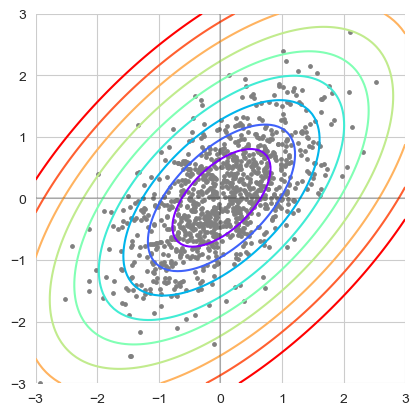

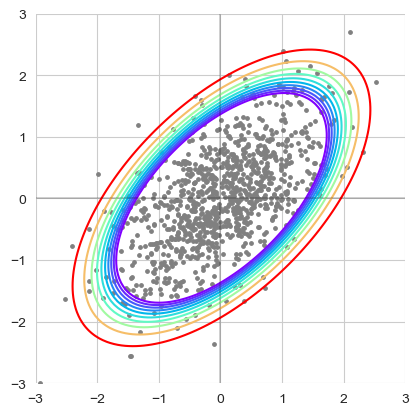

In [8]:
import numpy as np
from sklearn.covariance import EmpiricalCovariance

SIGMA = np.array([[5, 3], [3, 5]]) / 8;

mu = np.array([0, 0]);

R1, R2 = np.random.multivariate_normal(mu, SIGMA, 1000).T

x1 = np.linspace(-3, 3, 100);
x2 = x1;

[X1, X2] = np.meshgrid(x1, x2);

X = np.array([X1.flatten(), X2.flatten()]).T;

emp_cov_Xc = EmpiricalCovariance().fit(np.vstack((R1, R2)).T)

mahal_sq_Xc = emp_cov_Xc.mahalanobis(X)

mahal_sq_Xc = mahal_sq_Xc.reshape(X1.shape)
mahal_d_Xc = np.sqrt(mahal_sq_Xc)

import matplotlib.pyplot as plt

levels = np.linspace(1, 5, 9);

fig, ax = plt.subplots()

ax.contour(X1, X2, mahal_d_Xc, levels=levels, cmap='rainbow')
plt.scatter(R1, R2, s=6, color=[0.5, 0.5, 0.5])

ax.axhline(y=0, color='k', linewidth=0.25)
ax.axvline(x=0, color='k', linewidth=0.25)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.axis('scaled')

intervals = np.linspace(0.9, 0.99, 10);

from scipy.stats.distributions import chi2

dist_chi2_sqrt = np.sqrt(chi2.ppf(intervals, df=2));

fig, ax = plt.subplots()

ax.contour(X1, X2, mahal_d_Xc, levels=dist_chi2_sqrt, cmap='rainbow')
plt.scatter(R1, R2, s=6, color=[0.5, 0.5, 0.5])

ax.axhline(y=0, color='k', linewidth=0.25)
ax.axvline(x=0, color='k', linewidth=0.25)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.axis('scaled')

Text(0, 0.5, '$α$')

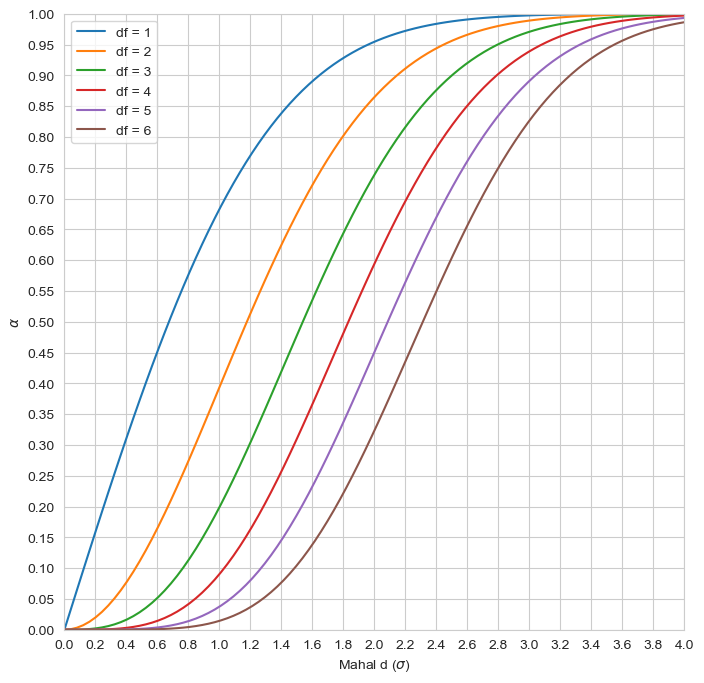

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats.distributions import chi2

intervals = np.linspace(0.9, 0.99, 11);

np.sqrt(chi2.ppf((0.9,0.95,0.99), df=1))
dist_chi2_sqrt = np.sqrt(chi2.ppf(intervals, df=2));

num_sigma = np.linspace(1,3,3)

prob = chi2.cdf(num_sigma**2, df=2)

x = np.linspace(0,4,100) # mahal d

fig, ax = plt.subplots(figsize=(8, 8))

for df in [1,2,3,4,5,6]:
    
    prob_x_df_D = chi2.cdf(x**2, df=df)
    
    plt.plot(x,prob_x_df_D, label = 'df = ' + str(df))

plt.grid(color = (0.8,0.8,0.8))
plt.legend()
plt.yticks(np.linspace(0,1,21))
plt.xticks(np.linspace(0,4,21))

plt.xlim(0,4)
plt.ylim(0,1)
plt.xlabel('Mahal d ($\sigma$)')
plt.ylabel('$\u03B1$')